Chapter 13

# 圆锥面
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码通过在平面上生成一个以 $(c_1, c_2) = (0,0)$ 为圆心、半径为 4 的二维圆形网格，以展示函数 $$f(x_1, x_2) = \sqrt{x_1^2 + x_2^2}$$ 的三维曲面图和等高线图。该函数的值代表平面上每个点 $(x_1, x_2)$ 到圆心的距离，因此，函数图像呈现出一个以圆心为最低点的向外辐射递增的三维曲面。

具体步骤如下：

1. 使用 `mesh_circ` 函数在极坐标系中生成网格，将极坐标 $(r, \theta)$ 转换为直角坐标 $(x_1, x_2)$。
2. 定义函数 $$f(x_1, x_2) = \sqrt{x_1^2 + x_2^2}$$，即将每个点 $(x_1, x_2)$ 到圆心的距离作为函数值，从而构造一个径向递增的平面。
3. 使用 `plot_wireframe` 绘制三维网格线框图，使用 `contour3D` 叠加等高线，通过颜色展示函数值的变化，生成一个环状的径向分布。

最终结果是一个三维的径向对称图，显示出从圆心到边界的高度递增趋势，颜色逐渐变深，帮助理解平面上的径向分布。该图像可用于展示中心对称的函数特性或模拟物理和数学中的径向场。

## 导入包

In [1]:
import numpy as np  # 导入numpy库，用于数值计算
import matplotlib.pyplot as plt  # 导入matplotlib库，用于绘图

## 定义mesh_circ函数，用于生成圆形网格

In [2]:
def mesh_circ(c1, c2, r, num):  # 参数分别为圆心坐标、半径和网格数量
    
    theta = np.arange(0, 2 * np.pi + np.pi / num, np.pi / num)  # 角度范围从0到2π
    r = np.arange(0, r, r / num)  # 半径范围从0到设定的r
    theta, r = np.meshgrid(theta, r)  # 创建极坐标网格
    xx1 = np.cos(theta) * r + c1  # 转换为直角坐标x1
    xx2 = np.sin(theta) * r + c2  # 转换为直角坐标x2
    
    return xx1, xx2  # 返回x1和x2的网格

## 使用mesh_circ函数生成圆形网格

In [3]:
xx1, xx2 = mesh_circ(0, 0, 4, 20)  # 圆心在(0, 0)，半径为4，分为20个网格

ff_x = np.sqrt(xx1**2 + xx2**2)  # 计算每个点到圆心的距离，定义为函数值

## 3D可视化

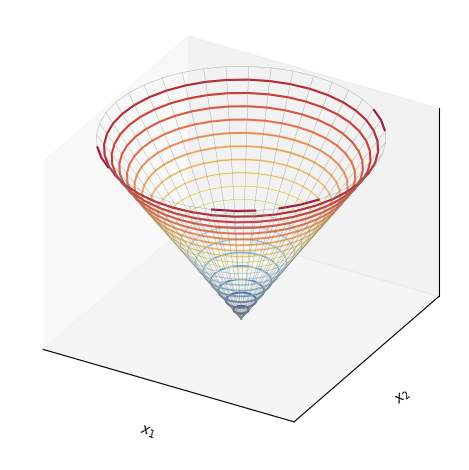

In [4]:
ax = plt.figure().add_subplot(projection='3d')  # 创建三维图形
ax.plot_wireframe(xx1, xx2, ff_x, rstride=1, 
                  cstride=1, color=[0.5, 0.5, 0.5], 
                  linewidth=0.2)  # 绘制网格线框图

ax.contour3D(xx1, xx2, ff_x, 20, cmap='RdYlBu_r')  # 绘制等高线

ax.xaxis.set_ticks([])  # 隐藏x轴刻度
ax.yaxis.set_ticks([])  # 隐藏y轴刻度
ax.zaxis.set_ticks([])  # 隐藏z轴刻度
plt.xlim(xx1.min(), xx1.max())  # 设置x轴范围
plt.ylim(xx2.min(), xx2.max())  # 设置y轴范围
ax.set_proj_type('ortho')  # 设置正交投影

ax.set_xlabel('$x_1$')  # 设置x轴标签
ax.set_ylabel('$x_2$')  # 设置y轴标签
ax.set_zlabel('$f(x_1,x_2)$')  # 设置z轴标签
plt.tight_layout()  # 自动调整布局